## Supplementary Figure 3

In [1]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as cPickle
import os.path as path
import os
from scipy import interpolate
from scipy.optimize import curve_fit

In [2]:
from submanifolds.ringnet import Plot
from submanifolds.utils import DataManager

## Analysis

### Preamble

In [3]:
stim = 'transient'
params_to_set = {'stim': [stim],
                 'type': ['projection'],
                 }

rescale_flag = [True, False]
shift_percent = np.arange(0,0.16,.01).round(3) #np.arange(0,0.11,.01).round(2)
perc_selectivity = np.arange(0,1,0.05).round(2)
seeds = np.arange(0,10,1) 

# tuple of static parameters for referencing
static_parameters = tuple(val[0] for val in params_to_set.values())

params_to_iterate = {'rescale': rescale_flag,
                     'p_inh': perc_selectivity,
                     'seed': seeds,
                     'shift_percent': shift_percent
                     }

In [4]:
# if new experiment is run, need to fill in name of folder here!
exp_data_dir = 'subspace_exp_2025-04-15_08:53:39'

In [5]:
manage = DataManager(exp_data_dir)

In [6]:
# load an example data set to get neuron population size (N) and number of time stamps (T)
# for this experiment N and T are the same for all simulations
parameter_setting = (True, 0, 0, 0) + static_parameters
net = manage.load_data(parameter_setting)

In [7]:
N = net.params.N
T = net.params.T
n_rescale = len(rescale_flag)
n_perc_sel = len(perc_selectivity)
n_shifts = len(shift_percent)
n_seeds = len(seeds)

In [8]:
colors = ['#586ba4', '#f68e5f', '#f5dd90', '#324376', '#f76c5e', 
          '#067d7a', '#77c1b3', '#f3c759', '#ed7364', '#b63653',
          '#6d2a2a', '#361a1a', '#191414', '#465865', '#928876',
          '#fc9234', '#fd6626', '#44867d', '#177070', '#404a50']

palette = ['#C47475', '#7F9CB0'] # ['#009E92', '#7F9CB0'] #['#1D7874', '#99A88C']

In [9]:
sns.set_style('ticks')  # seaborn style
ticksize = 16           # set tick font size
labelsize = 20          # set plot label sizes

In [10]:
# Figure storage
fig_dir_supplement = manage.root + 'figures/supplementary_figures/'
if not os.path.isdir(fig_dir_supplement):
    os.mkdir(fig_dir_supplement)
    print('Created ' + fig_dir_supplement)
else:
    print(fig_dir_supplement + ' already exists')

/home/andrew/Documents/projects/submanifolds/subspace_projections_with_selective_inhibition/rate_network/figures/supplementary_figures/ already exists


In [11]:
# figure storage
fig_dir = manage.root + 'figures/supplementary_figure_3/'
if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
    print('Created ' + fig_dir)
else:
    print('Directory already exists')
    
save_figs_flag = 1

Directory already exists


### Load eigendecomposition data
Returns data with following shapes (see next cell):

In [12]:
#evals_W = defaultdict(dict) 
#evals_PW = defaultdict(dict) 
#evals_Wr = defaultdict(dict) 

#val_W_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#val_W_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)
#val_PW_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)
#val_Wr_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)

#val_W_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#val_W_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#vec_W_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))
#vec_PW_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))
#vec_Wr_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))

In [13]:
eigendecomposition_data = manage.load_eigendecomposition_data()

for key in eigendecomposition_data.keys():
        exec(key + ' = eigendecomposition_data[key]')
        print('Extracted ' + key)

Extracted evals_W
Extracted evals_PW
Extracted evals_Wr
Extracted val_W_max
Extracted val_PW_max
Extracted val_Wr_max
Extracted val_W_argmax
Extracted val_PW_argmax
Extracted val_Wr_argmax
Extracted val_W_max_real
Extracted val_PW_max_real
Extracted val_Wr_max_real
Extracted val_W_max_imag
Extracted val_PW_max_imag
Extracted val_Wr_max_imag
Extracted vec_W_max
Extracted vec_PW_max
Extracted vec_Wr_max


# Supplementary Figure 3

In [14]:
# scaling
rescale_val = True
rescale_ind = rescale_flag.index(rescale_val) # 0 for rescaled, 1 for not rescaled weights

# not rescaled
no_rescale_val = False
no_rescale_ind = rescale_flag.index(no_rescale_val)

# percent selective inhibition
perc_val = .6
perc_ind = np.where(perc_selectivity==perc_val)[0][0]

# no selective inhibition
no_perc_val = 0
no_perc_ind = np.where(perc_selectivity==no_perc_val)[0][0]

# shift
shift_val = 0.1
shift_ind = np.where(shift_percent==shift_val)[0][0]

# no shift
no_shift_val = 0
no_shift_ind = np.where(shift_percent==no_shift_val)[0][0]

# seed
seed_val = 0
seed_ind = np.where(seeds==seed_val)[0][0]

## Produce figure

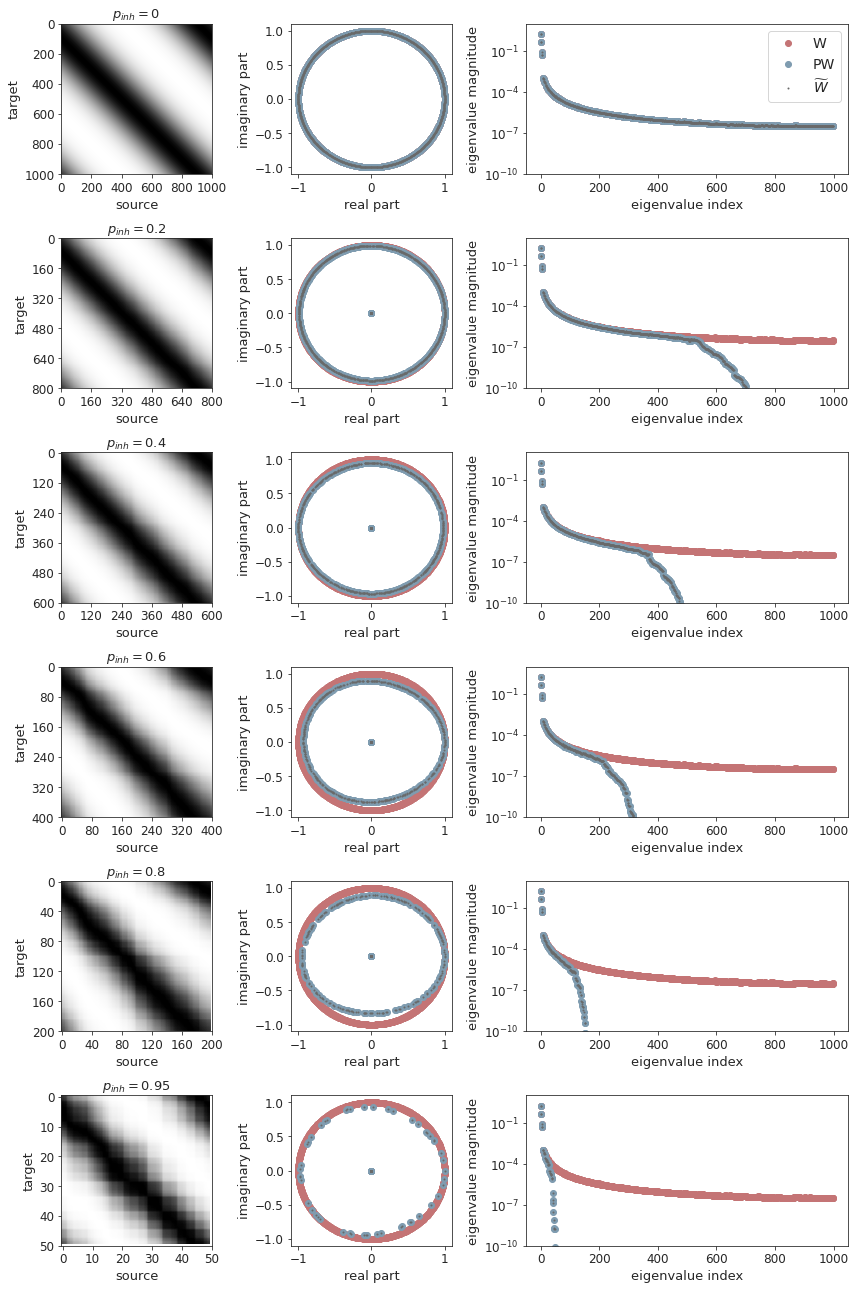

In [15]:
fname = 'figure_S3.pdf'

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12,18), 
                       gridspec_kw={'width_ratios': [1, 1, 2]})

perc_exs = [0, .2, .4, .6, .8, .95]

W_ = []

for i, perc_ex in enumerate(perc_exs):
    
    # PART 1: REDUCED WEIGHT MATRIX
    
    # parameter setting to load
    parameter_setting = (rescale_val, perc_ex, seed_val, shift_val) + static_parameters

    # load data from file
    net = manage.load_data(parameter_setting)

    # extract weight matrix and P matrix
    W = net.W
    P = net.P
    W_.append(W)

    # compute PW
    PW = np.diag(P)@W

    # make reduced row-column matrix
    W_reduced = W[P.astype(bool), :]
    W_reduced = W_reduced[:, P.astype(bool)]
    im = ax[i, 0].imshow(W_reduced, cmap='gray_r')
    n_neurons = np.shape(W_reduced)[0]
    ax[i, 0].set_xticks(np.linspace(0, n_neurons, 6))
    ax[i, 0].set_yticks(np.linspace(0, n_neurons, 6))

    # formatting
    ax[i,0].tick_params(labelsize=12)
    ax[i,0].set_xlabel('source', fontsize=13)
    ax[i,0].set_ylabel('target', fontsize=13)
    ax[i,0].set_title('$p_{inh} = $' + str(perc_ex), fontsize=13)
    
    # PART 2: EIGENVECTORS
    
    perc_ex_ind = np.where(perc_selectivity == perc_ex)[0][0]
    
    # normalize
    vec_W_norm = vec_W_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_W_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()
    vec_PW_norm = vec_PW_max[rescale_ind, perc_ex_ind, shift_ind, seed_ind,:] / np.abs(vec_PW_max[rescale_ind, perc_ex_ind, shift_ind, seed_ind,:]).max()
    vec_Wr_norm = vec_Wr_max[rescale_ind, perc_ex_ind, shift_ind, seed_ind,:] / np.abs(vec_Wr_max[rescale_ind, perc_ex_ind, shift_ind, seed_ind,:]).max()

    ax[i,1].scatter(vec_W_norm.real, vec_W_norm.imag, color=palette[0])
    ax[i,1].scatter(vec_PW_norm.real, vec_PW_norm.imag, color=palette[1])
    ax[i,1].scatter(vec_Wr_norm.real, vec_Wr_norm.imag, color='dimgrey', s=1)
    
    # formatting
    ax[i,1].tick_params(labelsize=12)
    ax[i,1].set_xlabel('real part', fontsize=13)
    ax[i,1].set_ylabel('imaginary part', fontsize=13)
    
    # PART 3: EIGENVALUES
    
    # eigenvalue magnitude of weight matrix, W
    ax[i,2].plot(abs(evals_W[no_rescale_ind, perc_ex_ind, shift_ind, seed_ind]), 'o', c=palette[0], label='W')

    # eigenvalue magnitude of PW
    ax[i,2].plot(abs(evals_PW[rescale_ind, perc_ex_ind, shift_ind, seed_ind]), 'o', c=palette[1], label='PW')
    ax[i,2].plot(abs(evals_Wr[rescale_ind, perc_ex_ind, shift_ind, seed_ind]), 'o', c='dimgrey', markersize=1,label='$\widetilde W$')

    # formatting plot
    ax[i,2].set_ylim(10**-10, 10)
    ax[i,2].set_yscale('log')
    ax[i,2].tick_params(labelsize=12)
    ax[i,2].set_xlabel('eigenvalue index', fontsize=13)
    ax[i,2].set_ylabel('eigenvalue magnitude', fontsize=13)
    
    if i == 0:
        leg = ax[i, 2].legend(fontsize=14, scatterpoints=1)
    
plt.tight_layout(pad=1)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()